In [1]:
# Importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
## Data collection and analysis
#  Loading the dataframe from csv file to pandas dataframe
insurance_dataset = pd.read_csv("C:/Users/Laxmikant/BTech/IBM/insurance.csv")
print(insurance_dataset)

       age  gender     bmi  children medical     region       charges
0     19.0  female  27.900       0.0     yes  southwest   16884.92400
1     18.0    male  33.770       1.0      no  southeast    1725.55230
2     28.0    male  33.000       3.0      no  southeast    4449.46200
3     33.0    male  22.705       0.0      no  northwest   21984.47061
4     32.0    male  28.880       0.0      no  northwest    3866.85520
...    ...     ...     ...       ...     ...        ...           ...
1335  18.0  female  36.850       0.0      no  southeast    1629.83350
1336  21.0  female  25.800       0.0      no  southwest    2007.94500
1337  61.0  female  29.070       0.0     yes  northwest   29141.36030
1338  20.0    male  26.000       0.0      no  southeast  100000.00000
1339  50.0  female  50.000       5.0     yes  northeast  500000.00000

[1340 rows x 7 columns]


In [3]:
insurance_dataset.head()

,age,gender,bmi,children,medical,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [4]:
## NO. of. rows and column
insurance_dataset.shape

(1340, 7)

In [5]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1340 non-null   float64
 1   gender    1340 non-null   object 
 2   bmi       1340 non-null   float64
 3   children  1340 non-null   float64
 4   medical   1340 non-null   object 
 5   region    1340 non-null   object 
 6   charges   1340 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.4+ KB


In [6]:
"""
Categorical features :
- Sex
- Smoker
- Region
"""
## Checking for missing value
insurance_dataset.isnull().sum()

age         0
gender      0
bmi         0
children    0
medical     0
region      0
charges     0
dtype: int64

In [7]:
## Data analysis
# statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.200746,30.674347,1.097015,13698.376859
std,14.052367,6.117818,1.209678,18132.705333
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.272500,0.000000,4744.325050
50%,39.000000,30.400000,1.000000,9388.753650
75%,51.000000,34.700000,2.000000,16781.331022
max,64.000000,53.130000,5.000000,500000.000000


C:\Users\Laxmikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


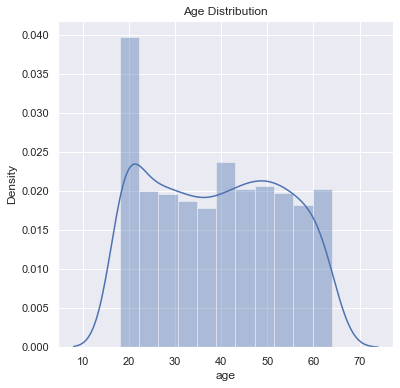

In [12]:
## Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [13]:
insurance_dataset['age'].value_counts()

18.0    69
19.0    68
50.0    30
20.0    30
51.0    29
47.0    29
46.0    29
45.0    29
48.0    29
52.0    29
22.0    28
49.0    28
54.0    28
53.0    28
21.0    28
26.0    28
24.0    28
25.0    28
28.0    28
27.0    28
23.0    28
43.0    27
29.0    27
30.0    27
41.0    27
42.0    27
44.0    27
31.0    27
40.0    27
32.0    26
33.0    26
56.0    26
34.0    26
55.0    26
57.0    26
37.0    25
59.0    25
58.0    25
36.0    25
38.0    25
35.0    25
39.0    25
61.0    23
60.0    23
63.0    23
62.0    23
64.0    22
Name: age, dtype: int64

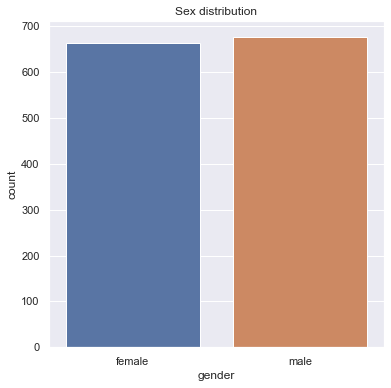

In [14]:
## Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='gender',data=insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [15]:
insurance_dataset['gender'].value_counts()

male      677
female    663
Name: gender, dtype: int64

C:\Users\Laxmikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


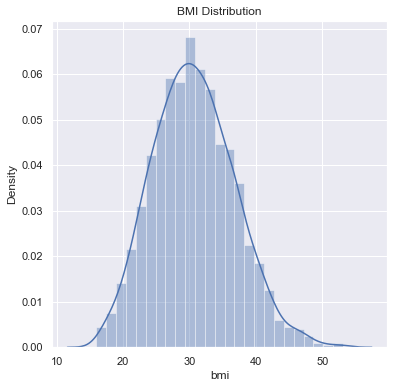

In [16]:
## BMI distribution
# Normal BMI range --> 18.5 to 24.9
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [17]:
insurance_dataset['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
28.880     8
          ..
46.700     1
46.200     1
23.800     1
44.770     1
50.000     1
Name: bmi, Length: 550, dtype: int64

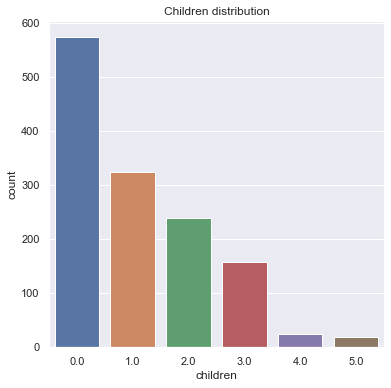

In [18]:
## Childern column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children distribution')
plt.show()

In [19]:
insurance_dataset['children'].value_counts()

0.0    575
1.0    324
2.0    240
3.0    157
4.0     25
5.0     19
Name: children, dtype: int64

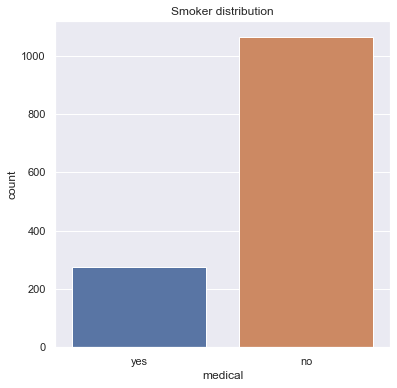

In [21]:
## Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='medical',data=insurance_dataset)
plt.title('Smoker distribution')
plt.show()

In [22]:
insurance_dataset['smoker'].value_counts()

KeyError: 'smoker'

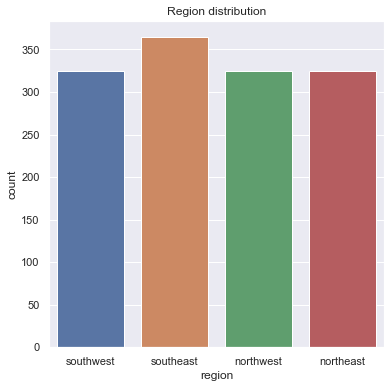

In [23]:
## Region distribution
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region distribution')
plt.show()

In [24]:
insurance_dataset['region'].value_counts()

southeast    365
southwest    325
northwest    325
northeast    325
Name: region, dtype: int64

C:\Users\Laxmikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


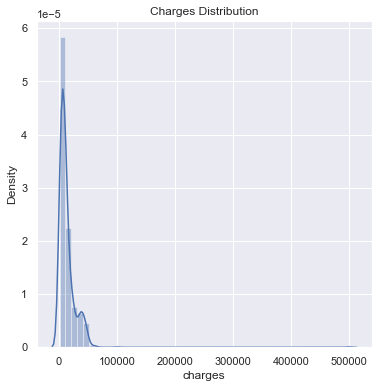

In [25]:
## Distribution of charge value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [37]:
## Data preprocessing
## Encoding the categorical features

#encoding sex column
insurance_dataset.replace({'gender':{'female':1,'male':0}},inplace=True)

#encoding smoker column
insurance_dataset.replace({'medical':{'no':1,'yes':0}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [38]:
## Splitting the features and target
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [39]:
print(X)

       age  gender     bmi  children  medical  region
0     19.0       1  27.900       0.0        0       1
1     18.0       0  33.770       1.0        1       0
2     28.0       0  33.000       3.0        1       0
3     33.0       0  22.705       0.0        1       2
4     32.0       0  28.880       0.0        1       2
...    ...     ...     ...       ...      ...     ...
1335  18.0       1  36.850       0.0        1       0
1336  21.0       1  25.800       0.0        1       1
1337  61.0       1  29.070       0.0        0       2
1338  20.0       0  26.000       0.0        1       0
1339  50.0       1  50.000       5.0        0       3

[1340 rows x 6 columns]


In [40]:
print(Y)

0        16884.92400
1         1725.55230
2         4449.46200
3        21984.47061
4         3866.85520
            ...     
1335      1629.83350
1336      2007.94500
1337     29141.36030
1338    100000.00000
1339    500000.00000
Name: charges, Length: 1340, dtype: float64


In [41]:
## Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(1340, 6) (1072, 6) (268, 6)


In [43]:
### Model training
### loading the Linear Regression model
regressor = LinearRegression()

In [52]:
regressor.fit(X,Y)

LinearRegression()

In [53]:
## Model evaluation
# prediction on training data
train_data_prediction = regressor.predict(X_train)

In [54]:
# R squared value - performance matrix
r2_train = metrics.r2_score(Y_train,train_data_prediction)
print('R Squared value : ', r2_train)

R Squared value :  0.3866235393599944


In [55]:
# prediction on training data
test_data_prediction = regressor.predict(X_test)

In [56]:
# R squared value - performance matrix
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Squared value : ', r2_test)

R Squared value :  0.5526172177255811


In [57]:
## Building a predictive system
input_data = (31,1,25.74,0,1,0)

#changing input_data into numpy array
input_data_as_numpyArray = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpyArray.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The Insurance Cost is USD ', prediction[0])

[1324.88324491]
The Insurance Cost is USD  1324.8832449148967


In [34]:
# Importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
## Data collection and analysis
#  Loading the dataframe from csv file to pandas dataframe
data = pd.read_csv('C:\\Users\\admin\\Downloads\medical report.csv')
print(data)

     age     sex  no. of surgeries  blood pressure  cholestrol  blood sugar  \
0     63    Male                 3             145         233         True   
1     37    Male                 2             130         250        False   
2     41  Female                 1             130         204        False   
3     56    Male                 1             120         236        False   
4     57  Female                 0             120         354        False   
..   ...     ...               ...             ...         ...          ...   
298   57  Female                 0             140         241        False   
299   45    Male                 3             110         264        False   
300   68    Male                 0             144         193         True   
301   57    Male                 0             130         131        False   
302   57  Female                 1             130         236        False   

     ecg  max. heart rate bone fracture  Target  
0

In [36]:
# Shape - Dimension of the dataframe
data.shape

(303, 10)

In [37]:
# Data types of the various columns
data.dtypes

age                  int64
sex                 object
no. of surgeries     int64
blood pressure       int64
cholestrol           int64
blood sugar           bool
ecg                  int64
max. heart rate      int64
bone fracture       object
Target               int64
dtype: object

In [38]:
# Display a few rows
data.head()

,age,sex,no. of surgeries,blood pressure,cholestrol,blood sugar,ecg,max. heart rate,bone fracture,Target
0,63,Male,3,145,233,True,0,150,No,1
1,37,Male,2,130,250,False,1,187,No,1
2,41,Female,1,130,204,False,0,172,No,1
3,56,Male,1,120,236,False,1,178,No,1
4,57,Female,0,120,354,False,1,163,Yes,1


In [39]:
data.describe()

,age,no. of surgeries,blood pressure,cholestrol,ecg,max. heart rate,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.528053,149.646865,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.525860,22.905161,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000,153.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000


In [40]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               303 non-null    int64 
 1   sex               303 non-null    object
 2   no. of surgeries  303 non-null    int64 
 3   blood pressure    303 non-null    int64 
 4   cholestrol        303 non-null    int64 
 5   blood sugar       303 non-null    bool  
 6   ecg               303 non-null    int64 
 7   max. heart rate   303 non-null    int64 
 8   bone fracture     303 non-null    object
 9   Target            303 non-null    int64 
dtypes: bool(1), int64(7), object(2)
memory usage: 21.7+ KB


In [41]:
data.isnull().sum()

age                 0
sex                 0
no. of surgeries    0
blood pressure      0
cholestrol          0
blood sugar         0
ecg                 0
max. heart rate     0
bone fracture       0
Target              0
dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


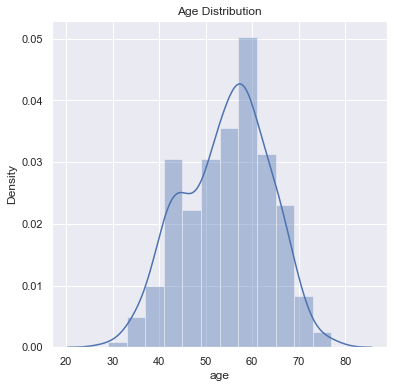

In [42]:
## Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

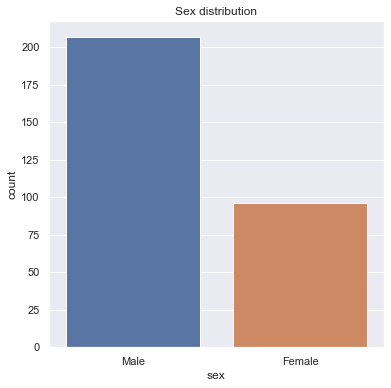

In [43]:
## Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('Sex distribution')
plt.show()

In [44]:
data['sex'].value_counts()

Male      207
Female     96
Name: sex, dtype: int64

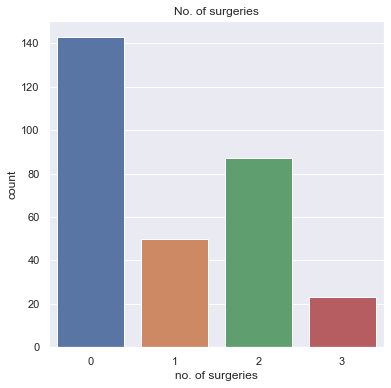

In [45]:
## No. of surgeries
plt.figure(figsize=(6,6))
sns.countplot(x='no. of surgeries',data=data)
plt.title('No. of surgeries')
plt.show()

In [46]:
data['no. of surgeries'].value_counts()

0    143
2     87
1     50
3     23
Name: no. of surgeries, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


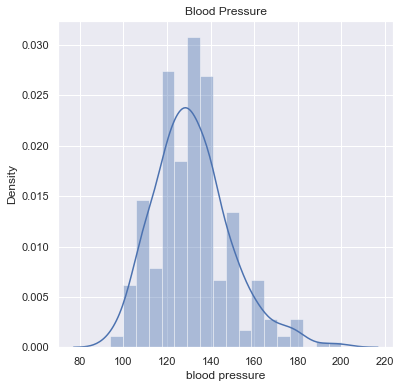

In [47]:
## Blood pressure
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['blood pressure'])
plt.title('Blood Pressure')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


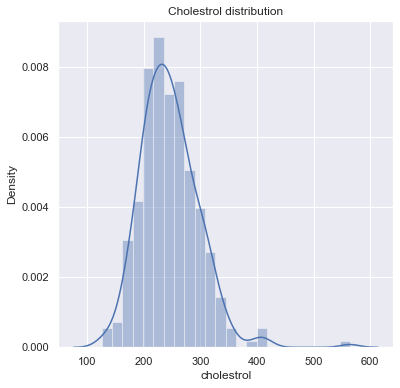

In [48]:
## cholestrol distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['cholestrol'])
plt.title('Cholestrol distribution')
plt.show()

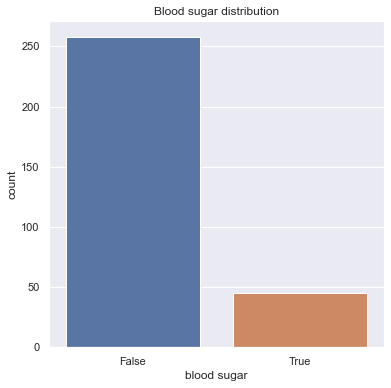

In [49]:
## blood sugar column
plt.figure(figsize=(6,6))
sns.countplot(x='blood sugar',data=data)
plt.title('Blood sugar distribution')
plt.show()

In [50]:
data['blood sugar'].value_counts()

False    258
True      45
Name: blood sugar, dtype: int64

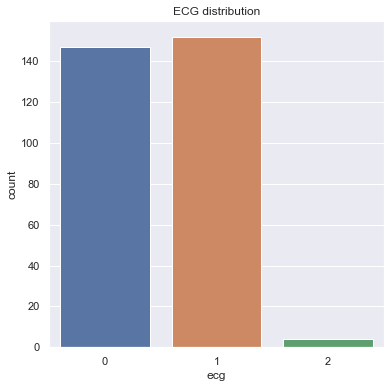

In [51]:
## ecg column
plt.figure(figsize=(6,6))
sns.countplot(x='ecg',data=data)
plt.title('ECG distribution')
plt.show()

In [52]:
data['ecg'].value_counts()

1    152
0    147
2      4
Name: ecg, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


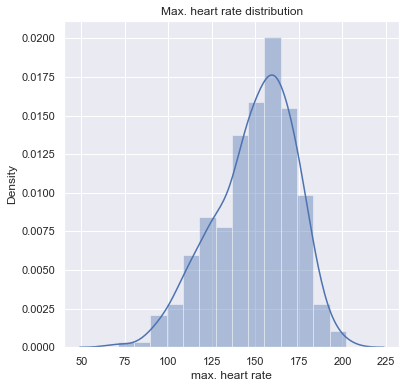

In [53]:
## max. heart rate column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['max. heart rate'])
plt.title('Max. heart rate distribution')
plt.show()

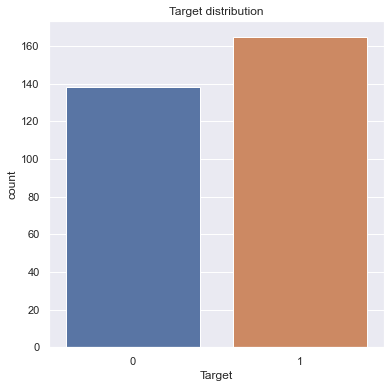

In [54]:
## Target column
plt.figure(figsize=(6,6))
sns.countplot(x='Target',data=data)
plt.title('Target distribution')
plt.show()

In [55]:
data['Target'].value_counts()

1    165
0    138
Name: Target, dtype: int64

In [56]:
## Data preprocessing
## Encoding the categorical features

#encoding sex column
data.replace({'sex':{'female':1,'male':0}},inplace=True)

#encoding blood sugar column
data.replace({'blood sugar':{'False':1,'True':0}},inplace=True)

In [57]:
## Splitting the features and target
X = data.drop(columns='Target',axis=1)
Y = data['Target']

In [58]:
print(X)

     age     sex  no. of surgeries  blood pressure  cholestrol  blood sugar  \
0     63    Male                 3             145         233         True   
1     37    Male                 2             130         250        False   
2     41  Female                 1             130         204        False   
3     56    Male                 1             120         236        False   
4     57  Female                 0             120         354        False   
..   ...     ...               ...             ...         ...          ...   
298   57  Female                 0             140         241        False   
299   45    Male                 3             110         264        False   
300   68    Male                 0             144         193         True   
301   57    Male                 0             130         131        False   
302   57  Female                 1             130         236        False   

     ecg  max. heart rate bone fracture  
0      0 

In [59]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Target, Length: 303, dtype: int64


In [64]:
## Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [65]:
print(X.shape,X_train.shape,X_test.shape)

(303, 9) (242, 9) (61, 9)
